In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("crest")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("data_for_visualize (5).csv")
gdf = gpd.read_file("diaphanhuyen.geojson")

In [4]:
print("GeoDataFrame columns:", gdf.columns)
print("\nDataFrame head:")
print(df.head())

GeoDataFrame columns: Index(['OBJECTID', 'f_code', 'Ten_Tinh', 'Ten_Huyen', 'Dan_So', 'Nam_TK',
       'Code_vung', 'geometry'],
      dtype='object')

DataFrame head:
          price  pType  pWidth  pLength  pArea  pLandArea  pNumberOfFloors  \
0  7.600000e+09  other    4.00    17.78  77.80       56.0              2.0   
1  1.070000e+10  other    3.50    11.20  56.10       38.8              5.0   
2  4.950000e+09  other    5.73    10.15  86.60       48.9              2.0   
3  4.260000e+09  other    3.27     9.05  56.50       29.7              2.0   
4  7.000000e+09  other    3.00    12.60  77.72       19.8              4.0   

   pNumberOfBathrooms  pNumberOfBedrooms pCertificateType pFurnitureStatus  \
0                 1.0                3.0      certificate            other   
1                 4.0                4.0      certificate            other   
2                 2.0                3.0      certificate            other   
3                 2.0                2.0      certi

In [6]:
gdf["Ten_Huyen"] = (
    gdf["Ten_Huyen"]
    .str.strip()
    .str.title()
    .replace({
        "Quậng 5": "Quận 5",
        "Hooc Môn": "Hóc Môn",
        "BÌnh Chánh": "Bình Chánh"
    })
)

# Lọc TP.HCM
if "Ten_Tinh" in gdf.columns:
    gdf = gdf[gdf["Ten_Tinh"].str.contains("Hồ Chí Minh", case=False, na=False)].copy()

# Chuẩn hóa tên quận/huyện trong DataFrame
df["district"] = (
    df["district"]
    .str.strip()
    .str.title()
    .replace({
        "Huyện Hóc Môn": "Hóc Môn",
        "Quận Bình Thạnh": "Bình Thạnh",
        "Quận Bình Tân": "Bình Tân",
        "Quận Gò Vấp": "Gò Vấp",
        "Quận Phú Nhuận": "Phú Nhuận",
        "Quận Thủ Đức": "Thủ Đức",
        "Thủ Đức Cũ": "Thủ Đức",
        "Quận Tân Bình": "Tân Bình",
        "Quận Củ Chi": "Củ Chi",
        "Quận Bình Chánh": "Bình Chánh",
        "Quận Nhà Bè": "Nhà Bè",
        "Quận Cần Giờ": "Cần Giờ"
    })
)

Phân phối giá BĐS

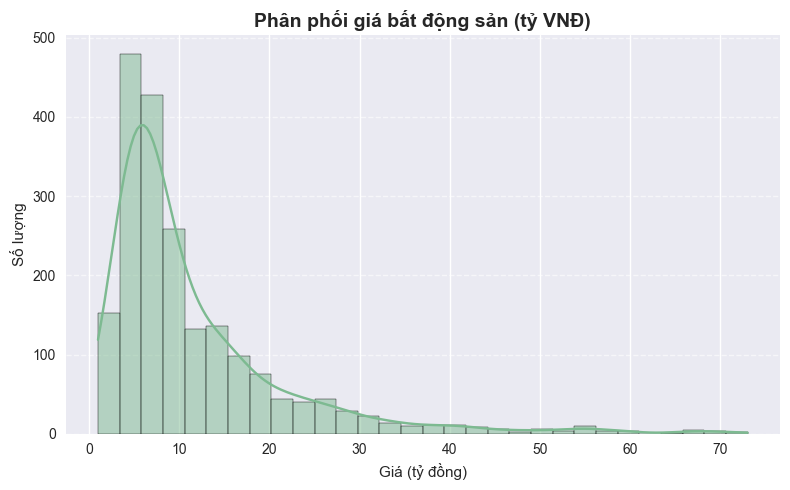

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'] / 1e9, bins=30, kde=True)
plt.title("Phân phối giá bất động sản (tỷ VNĐ)", fontsize=14, weight='bold')
plt.xlabel("Giá (tỷ đồng)")
plt.ylabel("Số lượng")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Phân phối loại hình BĐS

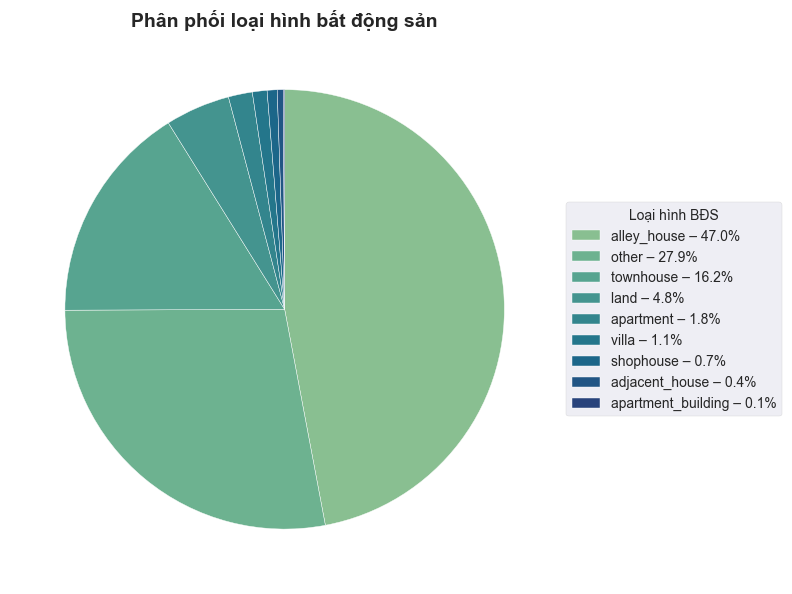

In [8]:
type_counts = df['pType'].value_counts()
type_percent = (type_counts / type_counts.sum()) * 100
labels = [f"{name} – {percent:.1f}%" for name, percent in zip(type_counts.index, type_percent)]

plt.figure(figsize=(8, 8))
plt.pie(
    type_counts,
    labels=None,
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'},
    colors=sns.color_palette("crest", len(type_counts))
)
plt.legend(
    labels,
    title="Loại hình BĐS",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True
)
plt.title("Phân phối loại hình bất động sản", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Giá trung bình theo loại hình BĐS

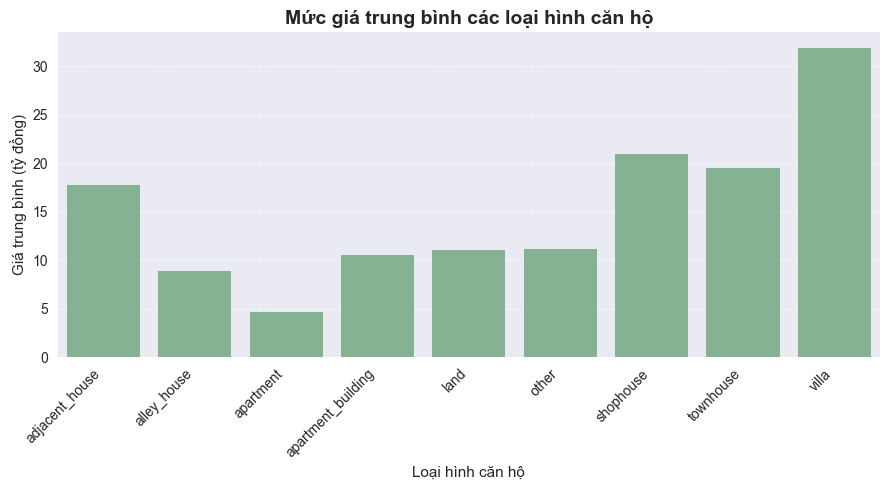

In [10]:
avg_price_by_type = df.groupby('pType')['price'].mean().reset_index()
avg_price_by_type['price_billion'] = avg_price_by_type['price'] / 1e9

plt.figure(figsize=(9, 5))
sns.barplot(
    x='pType',
    y='price_billion',
    data=avg_price_by_type
)
plt.title("Mức giá trung bình các loại hình căn hộ", fontsize=14, weight='bold')
plt.xlabel("Loại hình căn hộ")
plt.ylabel("Giá trung bình (tỷ đồng)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Giá trung binh theo quận/huyện

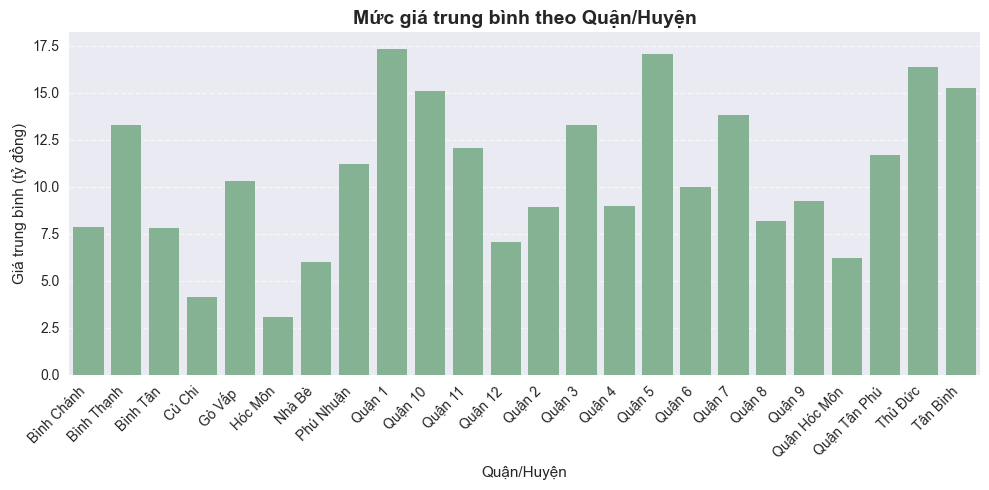

In [11]:
avg_price_by_district = df.groupby('district')['price'].mean().reset_index()
avg_price_by_district['price_billion'] = avg_price_by_district['price'] / 1e9

plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_price_by_district,
    x='district',
    y='price_billion'
)
plt.title("Mức giá trung bình theo Quận/Huyện", fontsize=14, weight='bold')
plt.xlabel("Quận/Huyện")
plt.ylabel("Giá trung bình (tỷ đồng)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Giá BĐS/m2 theo nhóm diện tích

C:\Users\FPT\AppData\Local\Temp\ipykernel_25280\943924566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['area_group'] = pd.cut(df_filtered['pArea'], bins=bins, labels=labels_area, right=False)
C:\Users\FPT\AppData\Local\Temp\ipykernel_25280\943924566.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(['area_group', 'pType'])['price_per_m2']


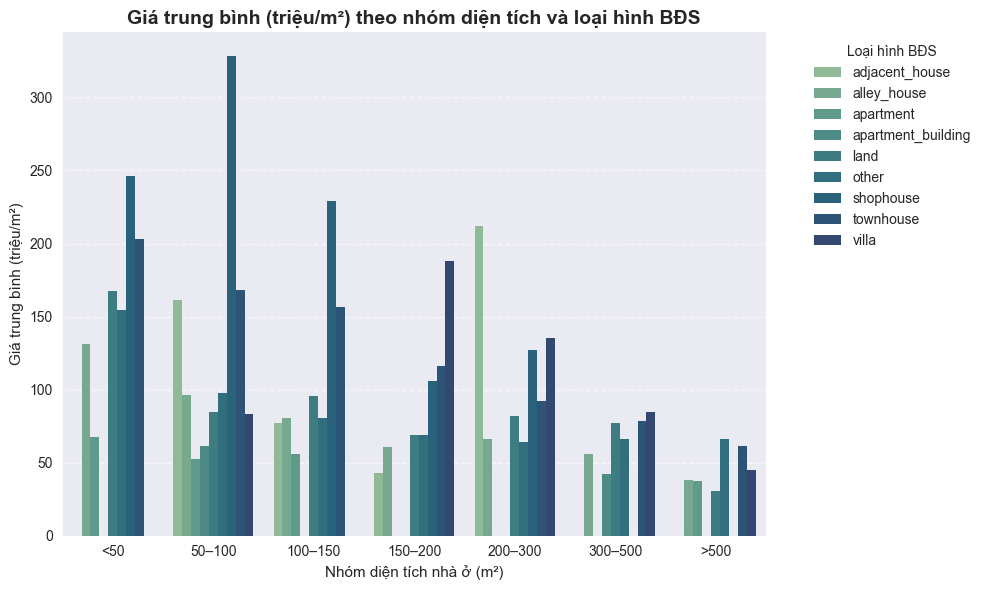

In [12]:
df['price_per_m2'] = (df['price'] / df['pArea']) / 1e6
df_filtered = df[(df['price_per_m2'] > 0) & (df['price_per_m2'] < 500)]

# Phân nhóm diện tích
bins = [0, 50, 100, 150, 200, 300, 500, 1000]
labels_area = ["<50", "50–100", "100–150", "150–200", "200–300", "300–500", ">500"]
df_filtered['area_group'] = pd.cut(df_filtered['pArea'], bins=bins, labels=labels_area, right=False)

# Tính giá trung bình theo nhóm
avg_price_type_area = (
    df_filtered.groupby(['area_group', 'pType'])['price_per_m2']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_price_type_area,
    x='area_group',
    y='price_per_m2',
    hue='pType',
    palette='crest'
)
plt.title("Giá trung bình (triệu/m²) theo nhóm diện tích và loại hình BĐS", 
          fontsize=14, weight='bold')
plt.xlabel("Nhóm diện tích nhà ở (m²)")
plt.ylabel("Giá trung bình (triệu/m²)")
plt.legend(title="Loại hình BĐS", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Bản đồ giá theo quận/huyện

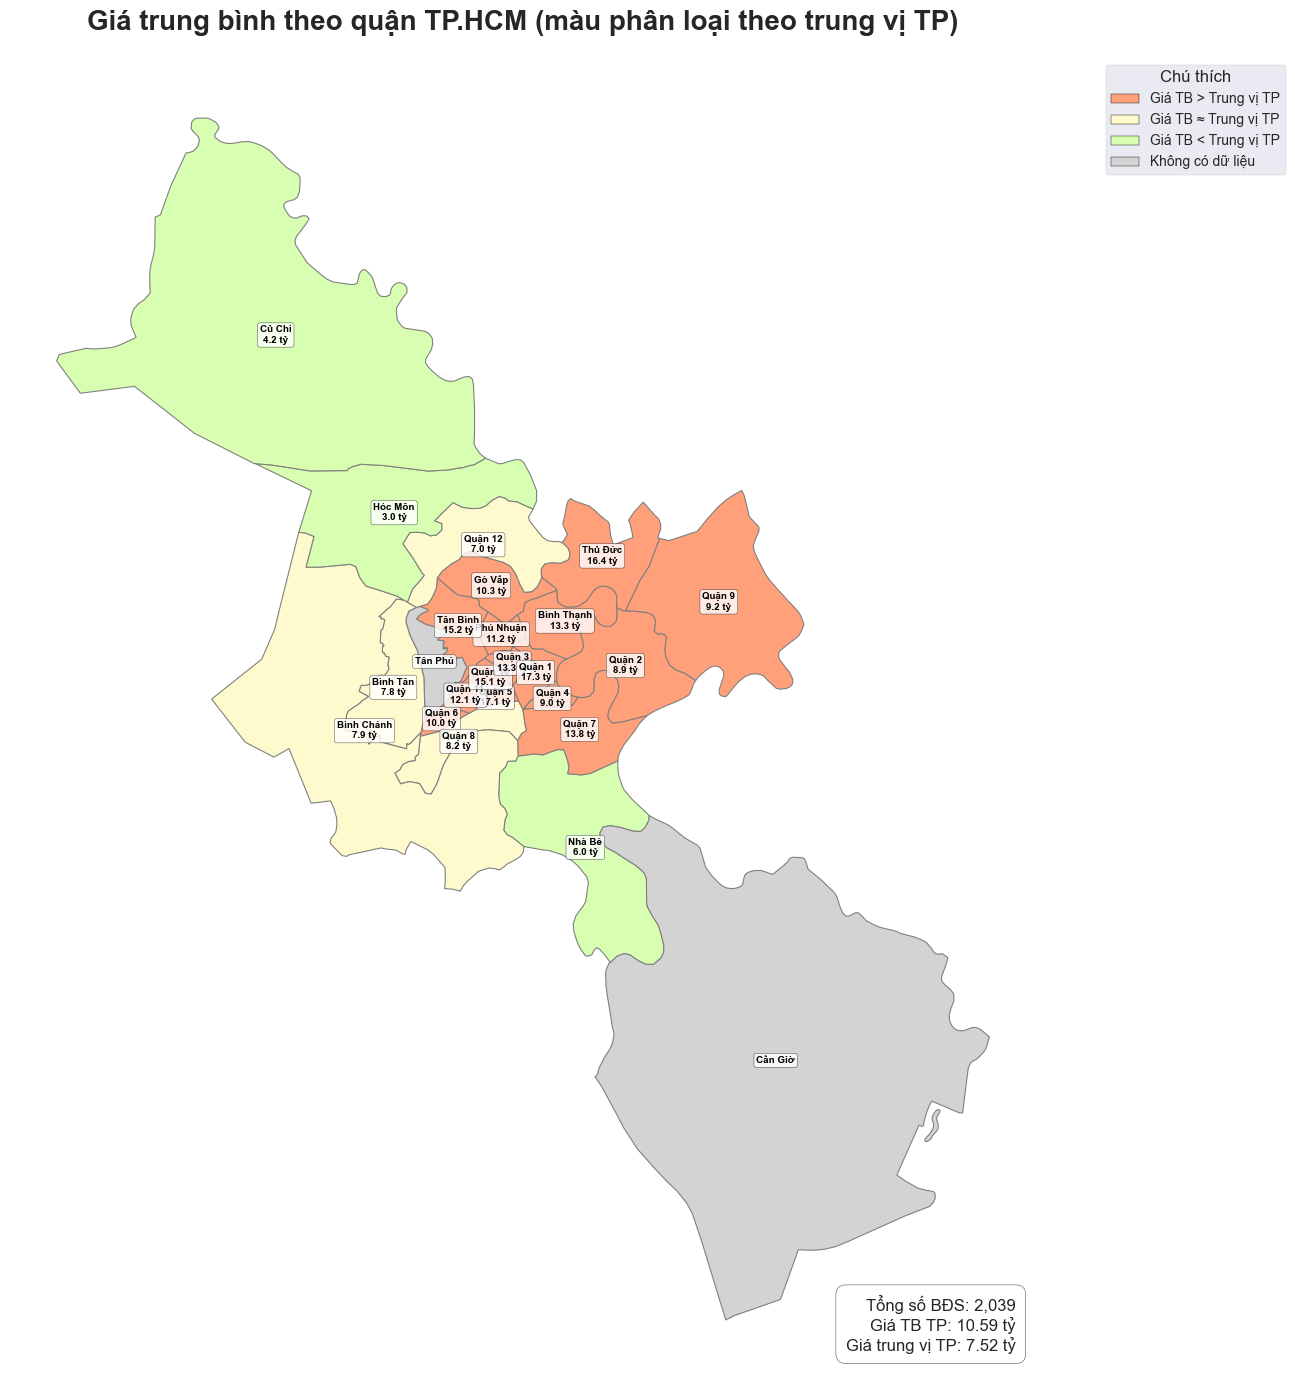

In [13]:
agg_price = df.groupby("district")["price"].agg(["mean", "median", "count"]).reset_index()
agg_price["price_billion"] = agg_price["mean"] / 1e9
agg_price["median_billion"] = agg_price["median"] / 1e9

# Trung vị toàn TP
median_city = agg_price["median"].median()

# Phân loại theo trung vị TP
def classify_price(row):
    if pd.isna(row["mean"]):
        return "nodata"
    elif row["mean"] > median_city * 1.1:
        return "above"
    elif row["mean"] < median_city * 0.9:
        return "below"
    else:
        return "around"

agg_price["category"] = agg_price.apply(classify_price, axis=1)

# Ghép dữ liệu với bản đồ
merged = gdf.merge(agg_price, left_on="Ten_Huyen", right_on="district", how="left")

# Màu sắc theo phân loại
color_map = {
    "above": "#FFA07A",
    "around": "#FFFACD",
    "below": "#D8FFB1",
    "nodata": "lightgray"
}
merged["color"] = merged["category"].map(color_map).fillna("lightgray")

# Vẽ bản đồ
fig, ax = plt.subplots(figsize=(16, 14))
merged.plot(
    color=merged["color"],
    linewidth=0.8,
    edgecolor="gray",
    ax=ax
)
ax.set_title(
    "Giá trung bình theo quận TP.HCM (màu phân loại theo trung vị TP)",
    fontsize=20, weight="bold", pad=20
)
ax.axis("off")

# Ghi nhãn cho từng quận
seen_labels = set()
for idx, row in merged.iterrows():
    if row.geometry is None:
        continue
    
    name = row["Ten_Huyen"]
    if name in seen_labels:
        continue
    seen_labels.add(name)
    
    centroid = row.geometry.centroid
    text = f"{name}\n{row['price_billion']:.1f} tỷ" if pd.notna(row["price_billion"]) else name
    
    ax.text(
        centroid.x, centroid.y, text,
        ha="center", va="center",
        fontsize=7, color="black", weight="bold",
        bbox=dict(
            boxstyle="round,pad=0.25",
            facecolor="white", alpha=0.8,
            edgecolor="black", linewidth=0.3
        )
    )

# Chú thích
legend_elements = [
    mpatches.Patch(facecolor='#FFA07A', edgecolor='black', label='Giá TB > Trung vị TP'),
    mpatches.Patch(facecolor='#FFFACD', edgecolor='black', label='Giá TB ≈ Trung vị TP'),
    mpatches.Patch(facecolor='#D8FFB1', edgecolor='black', label='Giá TB < Trung vị TP'),
    mpatches.Patch(facecolor='lightgray', edgecolor='black', label='Không có dữ liệu')
]
ax.legend(
    handles=legend_elements,
    title="Chú thích",
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    frameon=True,
    framealpha=1,
    bbox_to_anchor=(1.25, 1.0)
)

# Thống kê tổng hợp
total_bds = agg_price["count"].sum()
mean_city = agg_price["mean"].mean() / 1e9
median_city_billion = median_city / 1e9

text_stats = (
    f"Tổng số BĐS: {total_bds:,}\n"
    f"Giá TB TP: {mean_city:.2f} tỷ\n"
    f"Giá trung vị TP: {median_city_billion:.2f} tỷ"
)

ax.text(
    0.98, 0.02, text_stats,
    transform=ax.transAxes,
    fontsize=12,
    ha="right", va="bottom",
    bbox=dict(boxstyle="round,pad=0.6", facecolor="white", alpha=0.9, edgecolor="black")
)

plt.tight_layout()
plt.show()